In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#PROJET : REACTIONS CHIMIQUES OSCILLANTES


In [ ]:
#I. Contexte

#1. Compte-rendu

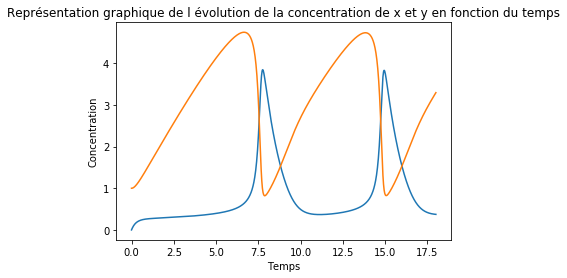

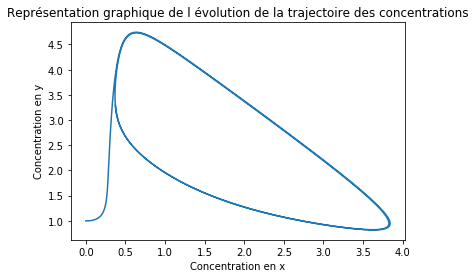

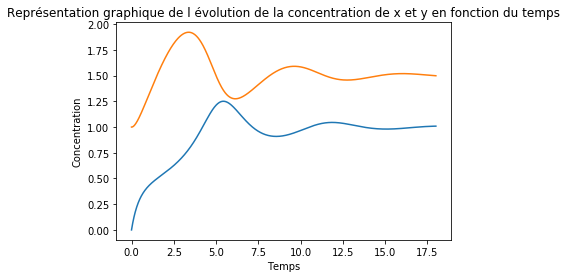

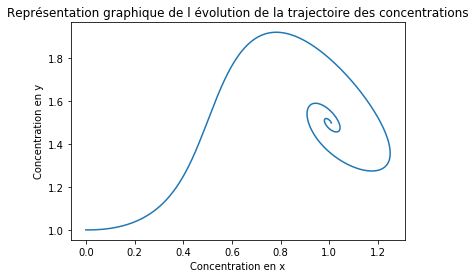

In [3]:
#II. Résolution avec le schéma Euler explicite 

#1.

def brusselator(A,B):
    def f(z):
        f= array([A+(z[0]**2)*z[1]-(B+1)*z[0],B*z[0]-(z[0]**2)*z[1]])
        return f
    return f

#2.

def stepEuler(f,zt,h):
    return (zt+h*f(zt))

#renvoie l'approximation z(t+h)=z(x(t+h),y(t+h))

#3.APPLICATIONS 

def approximation(z0,P,T,fonction):
    L=[]
    L.append(z0)
    h=T/P
    for i in range (P): #boucle sur tous les temps 
        a=stepEuler(fonction,L[i],h)
        L.append(a) #stockage de chaque approximation z(t)=(x(t),y(t))
    return L 

#4. Application (A1,B1)

z0=array([0,1])
(A1,B1)=(1,3)
fonction1=brusselator(A1,B1)
P=1000
T=18
app1=approximation(z0,P,T,fonction1)

#5. Application (A2,B2)

(A2,B2)=(1,1.5)
fonction2=brusselator(A2,B2)
P=1000
T=18
app2=approximation(z0,P,T,fonction2)


#6. Visulation des résultats 

#a.

def plot_concentration(z0,P,T,fonction):
    x=linspace(0,T,1001,endpoint=True) #t = temps 
    y=approximation(z0,P,T,fonction) # concentration
    fig=figure() 
    title('Représentation graphique de l évolution de la concentration de x et y en fonction du temps')
    xlabel('Temps')
    ylabel('Concentration')
    plot(x,y)
#b.

def plot_trajectoire(z0,P,T,fonction):
    temps=linspace(0,T,1001,endpoint=True)
    x=[]
    y=[]
    for t in range (1001):
        x.append(approximation(z0,P,T,fonction)[t][0])
        y.append(approximation(z0,P,T,fonction)[t][1])
    fig=figure()
    title('Représentation graphique de l évolution de la trajectoire des concentrations')
    xlabel('Concentration en x')
    ylabel('Concentration en y')
    plot(x,y)


#Application (A1,B1)

plot_concentration(z0,P,T,fonction1)
plot_trajectoire(z0,P,T,fonction1)

#Application (A2,B2)

plot_concentration(z0,P,T,fonction2)
plot_trajectoire(z0,P,T,fonction2)
    


Populating the interactive namespace from numpy and matplotlib


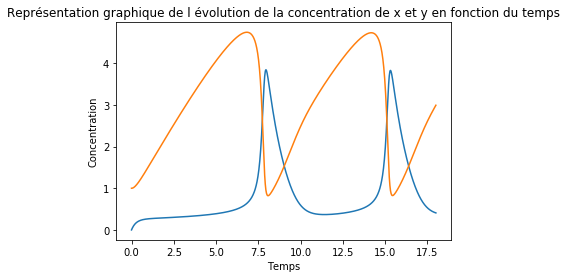

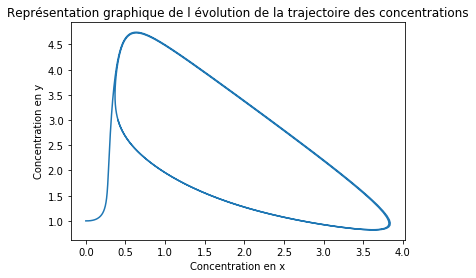

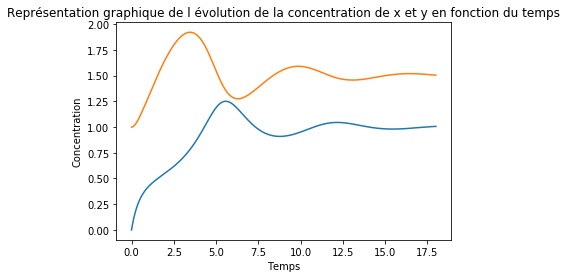

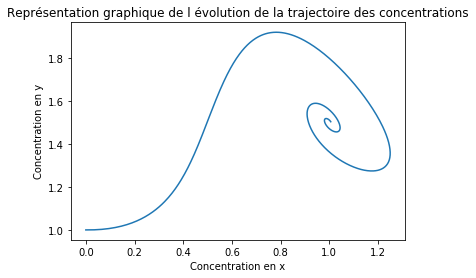

In [4]:
%pylab inline

#III. Méthode Runge-Kutta d'odre 4 


#1.

#On implémente d'abord une fonction qui retourne la valeur de Kj, qu'on appelera dans la fonction STEPRK4

def K(j,zt,h,f,beta):
    
    if j==0:
        
        return(f(zt)) #ce qui nous ramène à la partie précédente
    
    else:
        
        a=0
        
        for l in range (1,j):
            
            a=a+beta[j,l-1]*K(l,zt,h,f,beta)
        
        return(f(zt)+h*a)
    
def stepRK4(zt,h,f,m):
    #On consacre la fonction exclusivement au cas donné par l'énoncé afin d'éviter de mettre trop d'arguments et on y insère le Tableau de Butcher: on crée une matrice 6x6 associée aux coefficients β(j,l) et un vecteur associé aux coefficients γ(l)
    beta=array([[0,0,0,0,0,0],[0.25,0,0,0,0,0],[3/32,9/32,0,0,0,0],[1932/2197,-7200/2197,7296/2197,0,0,0],[439/216,-8,3680/513,-845/4104,0,0],[-8/27,2,-3544/2565,1859/4104,-11/40,0]])
    gamma=array([16/135,0,6656/12825,28561/56430,-9/50,2/55])
    approximation=zt
    for i in range (m):
        a=h*gamma[i]
        b=a*K(i,zt,h,f,beta)
        approximation=approximation+b
    return (approximation)

#2.

T=18
P=1000
h=T/P
z0=array([0,1])

#Application 1

(A1,B1)=(1,3)
fonction1=brusselator(A1,B1)
#Comme dans la partie précédente, on fait une boucle sur tous les temps qui permet d'obtenir l'approximation z(tp) à tous les instants et on stocke la trajectoire dans une liste
zt=z0 #initialisation 
L1=[zt]
for p in range (P-1):
    ztsuiv=stepRK4(zt,h,fonction1,6)
    zt=ztsuiv #on stocke la nouvelle valeur
    L1.append(zt)

#Application 2 (on fait la même chose)

(A2,B2)=(1,1.5)
fonction2=brusselator(A2,B2)
zt=z0 #initialisation
L2=[zt]
for p in range (P-1):
    ztsuiv=stepRK4(zt,h,fonction2,6)
    zt=ztsuiv
    L2.append(zt)

#3.

def plot_concentration_RK4(P,T,fonction,L):
    x=linspace(0,T,1000,endpoint=True)
    y=L
    fig=figure()
    title('Représentation graphique de l évolution de la concentration de x et y en fonction du temps')
    xlabel('Temps')
    ylabel('Concentration')
    plot(x,y)
    
def plot_trajectoire_RK4(P,T,fonction,L):
    fig=figure()
    title('Représentation graphique de l évolution de la trajectoire des concentrations')
    xlabel('Concentration en x')
    ylabel('Concentration en y')
    x=[]
    y=[]
    for i in range(1000):
        x.append(L[i][0]) #la première coordonnée pour la concentration de x
        y.append(L[i][1]) #la deuxième coordonnée pour la concentration de y
    plot(x,y)

# Visualisation graphique

z0=array([0,1])

#Application 1

plot_concentration_RK4(P,T,fonction1,L1)
plot_trajectoire_RK4(P,T,fonction1,L1)

#Application 2

plot_concentration_RK4(P,T,fonction2,L2)
plot_trajectoire_RK4(P,T,fonction2,L2)


In [ ]:
#IV. PAS DE TEMPS ADAPTATIF : Schéma RK45

[0.00791916 1.        ]
[0.00791916 1.        ]


Text(0.5, 1.0, 'Représentation graphique du pas du temps en fonction du temps (A2,B2)')

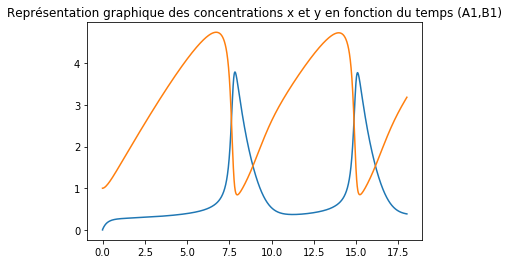

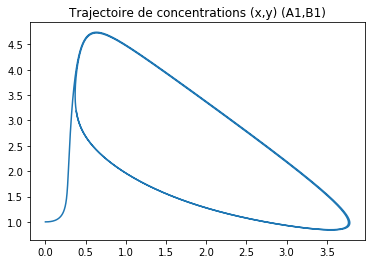

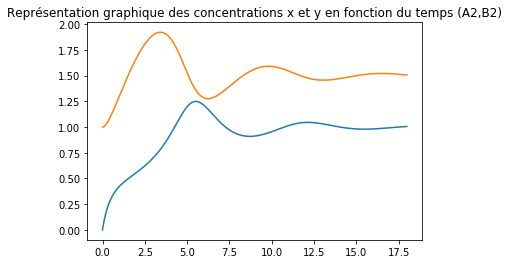

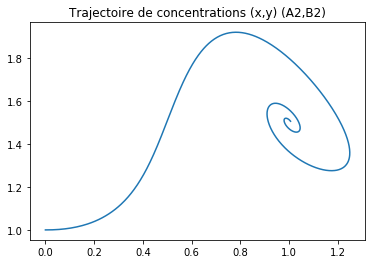

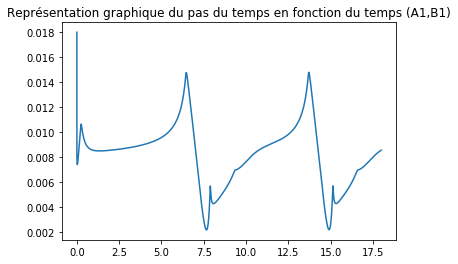

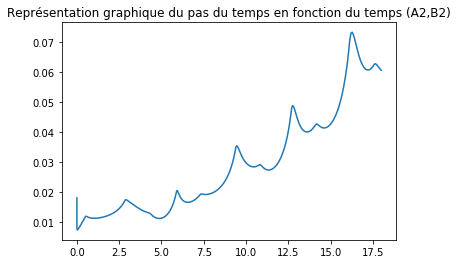

In [5]:
#1.

def epsilone(zt,h,f,beta,delta): #on implémente une fonction qui renvoie epsilone(t+h)
    a=0
    for i in range(6):
        a=a+ delta[i]*K(i,zt,h,f,beta)
    return norm(h*a,ord=inf)
        
def stepRK45(f,zt,hinit):
    
    beta=array([[0,0,0,0,0,0],[0.25,0,0,0,0,0],[3/32,9/32,0,0,0,0],[1932/2197,-7200/2197,7296/2197,0,0,0],[439/216,-8,3680/513,-845/4104,0,0],[-8/27,2,-3544/2565,1859/4104,-11/40,0]])
    gamma1=array([16/135,0,6656/12825,28561/56430,-9/50,2/55])
    gamma2=array([25/216,0,1408/2565,2197/4104,-1/5,0])
    delta=gamma1-gamma2
    
    emax=1.e-5
    
    hk=hinit
    eps=epsilone(zt,hk,f,beta,delta)
    
    while eps>emax: #on définit les nouveaux pas de temps suivant les règles de l'énoncé 
        
        c=0.9*(emax/epsilone(zt,hk,f,beta,delta))**(0.2)
        
        if c<0.1:
            hk1=hk*0,1
        
        elif c>5:
            hk1=hk*5
            
        else:
            hk1=hk*c
            
        eps=epsilone(zt,hk,f,beta,delta)
        hk=hk1
        
    hnext=hk
    
    #zt=stepRK4(zt,hnext,f,6)
    
    eps=epsilone(zt,hk,f,beta,delta)
    
    c=0.9*(emax/eps)**(0.2) #on le refait encore une fois pour renvoyer la nouvelle valeur hinit pour l'instant suivant 
    if c< 0.1: 
        hinit=hnext*0.1
    elif c>5:
        hinit=hnext*5
    else:
        hinit=hnext*c
    
    zt = stepRK4(zt,hnext,f,6)
    
    return zt,hinit,hnext 

#2 Résolution du problème par cette méthode 

z0=array([0,1])
(P,T)=(1000,18)

(A1,B1)=(1,3)
fonction1=brusselator(A1,B1)
R1=(stepRK45(fonction1,z0,T/P)[0])
print(R1)

(A2,B2)=(1,1.5)
fonction2=brusselator(A2,B2)
R2=(stepRK45(fonction2,z0,T/P)[0])
print(R2)

#3. Visualisation graphique : évolution concentration et trajectoire

# Application (A1,B1)

zt=z0
x1=[z0[0]]
y1=[z0[1]]
t1=0
temps1=[0] #ou t
hinit=T/P
pas1=[hinit]
while t1<=T:
    (zt,hinit,hnext)=stepRK45(fonction1,zt,hinit)
    x1.append(zt[0])
    y1.append(zt[1])
    temps1.append(t1)
    pas1.append(hnext)
    t1=t1+hnext
    
#x est le tableau qui contient les concentrations en x en fonction du temps
#y est le tableau qui contient les concentrations en y en fonction du temps
#pas1 est le tableau qui contient la valeur des pas (qu'on utilisera à la question suivante)   

#Evolution des concentrations 

fig=figure()
plot(temps1,x1)
plot(temps1,y1)
title('Représentation graphique des concentrations x et y en fonction du temps (A1,B1)')
#x1label('Temps')
#y1label('Concentration')
    
#Evolution des trajectoires

fig=figure()
plot(x1,y1)
title('Trajectoire de concentrations (x,y) (A1,B1)')
#x1label('x(t)')
#y1label('y(t)')

#____________________________________________________________


# Application (A2,B2)

zt=z0
x2=[z0[0]]
y2=[z0[1]]
t2=0
temps2=[0] #ou t
hinit=T/P
pas2=[hinit]
while t2<=T:
    (zt,hinit,hnext)=stepRK45(fonction2,zt,hinit)
    x2.append(zt[0])
    y2.append(zt[1])
    temps2.append(t2)
    pas2.append(hnext)
    t2=t2+hnext
    
#x est le tableau qui contient les concentrations en x en fonction du temps
#y est le tableau qui contient les concentrations en y en fonction du temps
#pas2 est le tableau qui contient les valeurs des pas (qu'on utilisera à la question suivante)
    
#Evolution des concentrations 

fig=figure()
plot(temps2,x2)
plot(temps2,y2)
title('Représentation graphique des concentrations x et y en fonction du temps (A2,B2)')
    
#Evolution des trajectoires

fig=figure()
plot(x2,y2)
title('Trajectoire de concentrations (x,y) (A2,B2)')
#x2label('x(t)')
#y2label('y(t)')


#4. La valeur des pas 

#Application (A1,B1)

fig=figure()
plot(temps1,pas1)
title('Représentation graphique du pas du temps en fonction du temps (A1,B1)')

#__________________________________

#Application (A2,B2)

fig=figure()
plot(temps2,pas2)
title('Représentation graphique du pas du temps en fonction du temps (A2,B2)')
    